# Explore here

In [ ]:
# Importamos las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import *

# EDA

In [ ]:
# Cargamos los datos con información de las columnas
Describe_Columna = pd.read_csv(r'..\data\raw\data_dict.csv', encoding='latin-1')
pd.set_option('display.max_rows', None)

 # Visualizamos los datos
Describe_Columna

In [ ]:
Describe_Columna.info()

In [ ]:
# Cargamos los datos
df = pd.read_csv(r'..\data\raw\demographic_health_data.csv')

# Visualizamos los datos
df.head()

In [ ]:
# Visualizamos las Estadísticas descriptivas
df.describe()

In [ ]:
# Visualizamos la informacion de la datasets
df.info()

In [ ]:
df.shape

In [ ]:
# Verificamos si existen datos únicos
n_unicos = df.nunique().sort_values(ascending=False)
n_unicos

In [ ]:
# Revisamos que no tengamos datos duplicados
df.duplicated().sum()

In [ ]:
# Verificamos los datos nulos o faltantes
(df.isnull().sum() > 0).sum() # Se realiza suma de faltantes por columna, se verifica si es mayor a 0 y se suman

In [ ]:
msno.matrix(df)

No hay datos faltantes en el datasets

Se eliminan columnas redundantes de información para minimizar datasets y datos a procesar

In [ ]:
Columnas_Drop = ['fips',
    '0-9 y/o % of total pop',
    '10-19 y/o % of total pop',
    '20-29 y/o % of total pop',
    '30-39 y/o % of total pop',
    '40-49 y/o % of total pop',
    '50-59 y/o % of total pop',
    '60-69 y/o % of total pop',
    '70-79 y/o % of total pop',
    '80+ y/o % of total pop',
    '% White-alone',
    '% Black-alone',
    '% NA/AI-alone',
    '% Asian-alone',
    '% Hawaiian/PI-alone',
    '% Two or more races',
    'POP_ESTIMATE_2018',
    'PCTPOVALL_2018',
    'Percent of adults with less than a high school diploma 2014-18',
    'Percent of adults with a high school diploma only 2014-18',
    'Percent of adults completing some college or associate\'s degree 2014-18',
    'Percent of adults with a bachelor\'s degree or higher 2014-18',
    'CI90LBINC_2018',
    'CI90UBINC_2018',
    'Civilian_labor_force_2018',
    'Population Aged 60+',
    'Percent of Population Aged 60+',
    'STATE_FIPS',
    'COUNTY_NAME',
    'STATE_NAME',
    'CNTY_FIPS',
    'anycondition_prevalence',
    'anycondition_Lower 95% CI',
    'anycondition_Upper 95% CI',
    'Obesity_prevalence',
    'Obesity_Lower 95% CI',
    'Obesity_Upper 95% CI',
    'Heart disease_prevalence',
    'Heart disease_Lower 95% CI',
    'Heart disease_Upper 95% CI',
    'COPD_prevalence',
    'COPD_Lower 95% CI',
    'COPD_Upper 95% CI',
    'diabetes_prevalence',
    'diabetes_Lower 95% CI',
    'diabetes_Upper 95% CI',
    'CKD_prevalence',
    'CKD_Lower 95% CI',
    'CKD_Upper 95% CI']

# Cantidades de columnas a eliminar
len(Columnas_Drop)

In [ ]:
# Eliminamos las columnas que no aportan información
df = df.drop(columns=Columnas_Drop, errors='ignore')

In [ ]:
# Veriificamos la eliminación de las columnas
df.shape

Combinamos variables relacionadas entre sí.
Edades, Razas/Etnias, Profesionales Médicos y Condiciones de Salud

In [ ]:
# Combinaciones de Edad
df['Age_0_19'] = df['0-9'] + df['19-Oct']
df['Age_20_39'] = df['20-29'] + df['30-39']
df['Age_40_59'] = df['40-49'] + df['50-59']
df['Age_60+'] = df['60-69'] + df['70-79'] + df['80+']

# Combinaciones de Raza/Etnicidad
df['Other_races'] = (df['Native American/American Indian-alone pop'] + 
    df['Asian-alone pop'] + 
    df['Hawaiian/Pacific Islander-alone pop'] + 
    df['Two or more races pop'])

# Calcular el índice de disponibilidad de profesionales de la salud
df['healthcare_availability_index'] = (
    df['Active Physicians per 100000 Population 2018 (AAMC)'] +
    df['Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)'] +
    df['Active Primary Care Physicians per 100000 Population 2018 (AAMC)'] +
    df['Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)'] +
    df['Active General Surgeons per 100000 Population 2018 (AAMC)'] +
    df['Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)']
) / 6

# Eliminar columnas combinadas
df = df.drop(columns=[
    '0-9', '19-Oct', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80+', 
    'Native American/American Indian-alone pop', 'Asian-alone pop', 'Hawaiian/Pacific Islander-alone pop', 
    'Two or more races pop', 'Total Population', 'Active Physicians per 100000 Population 2018 (AAMC)',
    'Total Active Patient Care Physicians per 100000 Population 2018 (AAMC)',
    'Active Primary Care Physicians per 100000 Population 2018 (AAMC)',
    'Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC)',
    'Active General Surgeons per 100000 Population 2018 (AAMC)',
    'Active Patient Care General Surgeons per 100000 Population 2018 (AAMC)'], errors='ignore')

# Creación de una nueva variable que sume todas las condiciones de salud
df['total_health_conditions'] = (
    df['anycondition_number'] +
    df['Obesity_number'] +
    df['Heart disease_number'] +
    df['COPD_number'] +
    df['diabetes_number'] +
    df['CKD_number'])

In [26]:
df.columns

Index(['TOT_POP', 'White-alone pop', 'Black-alone pop', 'N_POP_CHG_2018',
       'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018',
       'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018',
       'R_NET_MIG_2018', 'Less than a high school diploma 2014-18',
       'High school diploma only 2014-18',
       'Some college or associate's degree 2014-18',
       'Bachelor's degree or higher 2014-18', 'POVALL_2018', 'PCTPOV017_2018',
       'PCTPOV517_2018', 'MEDHHINC_2018', 'Employed_2018', 'Unemployed_2018',
       'Unemployment_rate_2018', 'Median_Household_Income_2018',
       'Med_HH_Income_Percent_of_State_Total_2018',
       'Total nurse practitioners (2019)', 'Total physician assistants (2019)',
       'Total Hospitals (2019)', 'Internal Medicine Primary Care (2019)',
       'Family Medicine/General Practice Primary Care (2019)',
       'Total Specialist Physicians (2019)', 'ICU Beds_x',
       'county_pop2018_18 and older', 'anycondition_number', 'Obesity_nu

# Visualizaciones

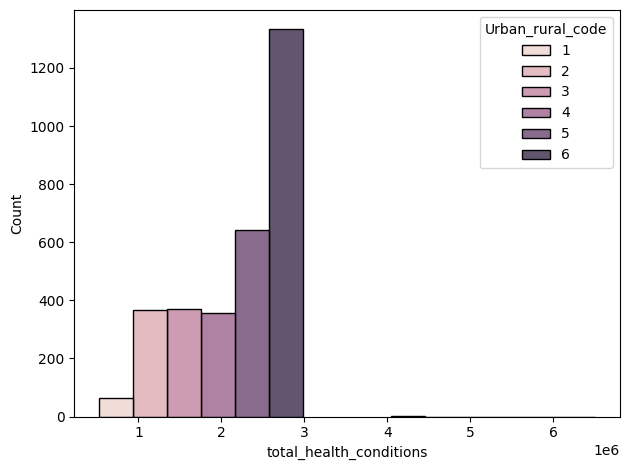

In [43]:
# Seleccionamos las columnas numéricas
columnas_numericas = df[['total_health_conditions',]].columns

#Creamos hisplot para cada una
#fig, axes = plt.subplots(1, 1, figsize=(10, 5))
#axes = axes.flatten()  # Convertimos los ejes en una lista plana para iterar

#Iteramos por cada columna del dataframe
for i, columna in enumerate(columnas_numericas):
    sns.histplot(
        #ax=axes[i],
        x=columna, 
        data=df,
        bins= 2,
        hue= 'Urban_rural_code',
        multiple = 'dodge',  # separamos las barras para no superponer
        shrink = 0.7), # ancho de barras
        #alpha = 0.6)  # Ajustamos transparencia)  
    #axes[i].set_title(columna)

#Para mostrar el gráfico
plt.tight_layout()
plt.show()

In [42]:
df[['total_health_conditions',]].describe()

,total_health_conditions
count,3.140000e+03
mean,8.187918e+04
std,2.416289e+05
min,1.010000e+02
25%,1.054875e+04
50%,2.432950e+04
75%,6.118950e+04
max,7.034188e+06


In [ ]:
'''
# Realizar el análisis y construir el modelo de regresión lineal
import statsmodels.api as sm

# Seleccionar variables independientes (features) y la variable objetivo (target)
features = ['TOT_POP', 'Age_0_19', 'Age_20_39', 'Age_40_59', 'Age_60+', 'White-alone pop', 'Black-alone pop', 'Other_races', 
            'MEDHHINC_2018', 'POVALL_2018', 'Employed_2018', 'Unemployment_rate_2018', 
            'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', 
            'Some college or associate\'s degree 2014-18', 'Bachelor\'s degree or higher 2014-18']
target = 'total_health_conditions'

# Añadir una constante (intercepto) al modelo
X = sm.add_constant(df[features])
y = df[target]

# Ajustar el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Resumen del modelo
print(modelo.summary())
'''